Licensed under the MIT License.

Copyright (c) 2021-2025. All rights reserved.

# Lotus Queen - Outlier Plot

* How to convert an image to a matplot marker
  * Find an image (I perfer .png format) that you want to use as the marker
  * Download free version of Inkscape and open the image. Select the image and click "trace bitmap". Then drag the image object, you will find another object with the path has been created, delete the original image object. `Ctr + Shift + R` to resize canvas to the same size as the selected object, then save it as .svg file.
  * With the saved .svg file, you can parse the path string with `minidom` as what I did below
  * Then use `parse_path()` from `svgpath2mpl` will parse the marker output

In [1]:
# !pip install svgpath2mpl matplotlib
from svgpath2mpl import parse_path
import matplotlib.pyplot as plt       
import pandas as pd
import numpy as np
from xml.dom import minidom

In [4]:
n = 300

time_mean = 8
time_std = 0.5
month_mean = 7.5
month_std = 0.2

normal_lotus_time = np.random.normal(time_mean, time_std, n)
normal_lotus_month = np.random.normal(month_mean, month_std, n)

print(min(normal_lotus_time), max(normal_lotus_time))
print(min(normal_lotus_month), max(normal_lotus_month))

6.6875747476978615 9.497347786784538
6.90565056391191 8.086312875276917


In [5]:
lotus_df = pd.DataFrame({'open_month': normal_lotus_time, 'open_time':normal_lotus_month})

lotus_df.tail()

,open_month,open_time
295,8.277519,7.110973
296,8.221497,7.231107
297,7.833398,7.302553
298,8.107680,7.287940
299,9.497348,7.629485


In [6]:
lotus_df.loc[len(lotus_df)] = [12, 22]

lotus_df.tail()

,open_month,open_time
296,8.221497,7.231107
297,7.833398,7.302553
298,8.107680,7.287940
299,9.497348,7.629485
300,12.000000,22.000000


In [7]:
# Get the path string from the .svg file
doc = minidom.parse('lotus.svg')
path_strings = [path.getAttribute('d') for path
                in doc.getElementsByTagName('path')]
doc.unlink()

path_strings

['m 161.03049,137.91065 c 8.31135,1.45443 14.70076,6.20864 18.77736,13.97176 2.22694,4.2408 3.77244,8.60174 3.22649,9.10421 -0.43076,0.39645 -8.07175,1.55837 -10.36589,1.57628 l -2.09578,0.0164 -0.29507,5.51071 c -0.31924,5.96184 -1.10643,9.43227 -2.22948,9.8289 -0.99614,0.35181 -7.70811,-1.97847 -11.07798,-3.84607 l -2.82003,-1.56289 -1.512,2.42137 c -1.79361,2.87234 -6.0245,7.75439 -7.34577,8.47631 -0.79354,0.43358 -1.28063,0.15568 -3.21452,-1.83397 -1.2536,-1.28974 -3.30752,-3.85433 -4.56427,-5.69908 l -2.285,-3.35409 -2.81053,1.55762 c -3.39698,1.88263 -10.0773,4.19085 -11.09189,3.83253 -1.03986,-0.36726 -1.92735,-4.43258 -2.22695,-10.20099 l -0.25725,-4.95308 -5.29641,-0.54472 c -6.44358,-0.6627 -7.45167,-1.06815 -7.00412,-2.81705 1.50597,-5.88492 6.32614,-13.53388 10.48739,-16.64206 5.28251,-3.94569 10.41045,-5.33656 18.75235,-5.08629 9.68847,0.29068 11.76202,0.28358 16.81623,-0.0576 3.30996,-0.22343 5.97711,-0.12797 8.43312,0.30182 z m -9.61579,1.51448 -2.34407,0.2957 4.69347,2.

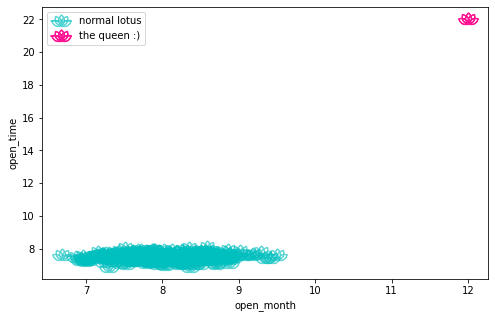

In [10]:
plt.figure(figsize=(8,5))
lotus = parse_path(path_strings[0])
lotus.vertices -= lotus.vertices.mean(axis=0)         
plt.plot(lotus_df['open_month'].values[:-1], lotus_df['open_time'].values[:-1], marker=lotus, markersize=20, color='c', alpha=0.5, label='normal lotus')
plt.plot(lotus_df['open_month'].values[-1], lotus_df['open_time'].values[-1], marker=lotus, markersize=20, color='deeppink', label='the queen :)')
plt.xlabel('open_month')
plt.ylabel('open_time')
plt.legend()
plt.show()